<a href="https://colab.research.google.com/github/Danusyasundaravel/Fraud-detection/blob/main/DL_ASSIGNMENT1_FRAUD_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**LOAD THE DATASET**

In [2]:
data=pd.read_csv("/content/drive/MyDrive/DL/fraud_detection.csv")


In [3]:
data.head()

,Unnamed: 0,step,type,branch,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
0,0,1,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,0,Current,3/1/2018,Morning,0.0
1,1,1,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,0,Savings,5/1/2018,Morning,0.0
2,2,1,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,0,Current,7/1/2018,Morning,1.0
3,3,1,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,Current,6/1/2018,Afternoon,1.0
4,4,1,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,0,Current,6/1/2018,Morning,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           10127 non-null  int64  
 1   step                 10127 non-null  int64  
 2   type                 10123 non-null  object 
 3   branch               10127 non-null  object 
 4   amount               10125 non-null  float64
 5   nameOrig             10121 non-null  object 
 6   oldbalanceOrg        10125 non-null  float64
 7   newbalanceOrig       10127 non-null  float64
 8   nameDest             10121 non-null  object 
 9   oldbalanceDest       10126 non-null  float64
 10  newbalanceDest       10125 non-null  float64
 11  unusuallogin         10127 non-null  int64  
 12  isFlaggedFraud       10127 non-null  int64  
 13  Acct type            10117 non-null  object 
 14  Date of transaction  10120 non-null  object 
 15  Time of day          10125 non-null 

**CHECK FOR NULL VALUES AND DROP THE VALUES**

In [5]:
data.isnull().sum()

Unnamed: 0              0
step                    0
type                    4
branch                  0
amount                  2
nameOrig                6
oldbalanceOrg           2
newbalanceOrig          0
nameDest                6
oldbalanceDest          1
newbalanceDest          2
unusuallogin            0
isFlaggedFraud          0
Acct type              10
Date of transaction     7
Time of day             2
isFraud                 2
dtype: int64

In [6]:
data.dropna(inplace=True)

**DROPPING COLUMNS THAT DOES NOT HELP IN CLASSIFICATION**

In [7]:
data.drop(["Unnamed: 0","nameOrig","nameDest"],axis=1,inplace=True)

In [12]:
data.drop(["Date of transaction"],axis=1,inplace=True)

**DATA DESCRIBE**

In [8]:
data.describe(include="all")

,step,type,branch,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,unusuallogin,isFlaggedFraud,Acct type,Date of transaction,Time of day,isFraud
count,10088.000000,10088,10088,1.008800e+04,1.008800e+04,1.008800e+04,1.008800e+04,1.008800e+04,10088.000000,10088.0,10088,10088,10088,10088.000000
unique,NaN,5,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,14,3,NaN
top,NaN,PAYMENT,Estados Unidos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Savings,6/1/2018,Afternoon,NaN
freq,NaN,5522,1277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6971,1444,3615,NaN
mean,4.219568,NaN,NaN,1.049915e+05,8.867322e+05,9.077738e+05,9.345118e+05,1.108236e+06,10.515266,0.0,NaN,NaN,NaN,0.006741
std,2.482469,NaN,NaN,2.710144e+05,2.127829e+06,2.173468e+06,2.680995e+06,3.046412e+06,5.809692,0.0,NaN,NaN,NaN,0.081829
min,1.000000,NaN,NaN,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0,NaN,NaN,NaN,0.000000
25%,1.000000,NaN,NaN,4.392407e+03,1.355000e+02,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,0.0,NaN,NaN,NaN,0.000000
50%,5.000000,NaN,NaN,1.281875e+04,2.139400e+04,1.028301e+04,0.000000e+00,0.000000e+00,10.000000,0.0,NaN,NaN,NaN,0.000000
75%,7.000000,NaN,NaN,1.144090e+05,1.732060e+05,1.721509e+05,2.818829e+05,2.523736e+05,16.000000,0.0,NaN,NaN,NaN,0.000000


**ENCODING DATA WHICH ARE OBJECT DATATYPE AS MODEL ONLY ACCEPTS THE NUMERICAL DATA**

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])
data['branch']=label_encoder.fit_transform(data['branch'])

In [10]:
data['Time of day'] = label_encoder.fit_transform(data['Time of day'])

In [11]:
data['Acct type'] = label_encoder.fit_transform(data['Acct type'])

**SPLITTING DATA INTO TRAIN AND TEST DATA**

In [13]:
x = data.columns.drop('isFraud')
y = data['isFraud']
data.drop('isFraud', axis=1, inplace =True)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=0)

In [15]:
print('Train Features - X_train:', np.shape(X_train))
print('Train Labels - y_train:', np.shape(y_train))
print('Test Features - X_test:', np.shape(X_test))
print('Test Labels y_test:', np.shape(y_test))

Train Features - X_train: (8070, 12)
Train Labels - y_train: (8070,)
Test Features - X_test: (2018, 12)
Test Labels y_test: (2018,)


**MODEL FOR CLASSIFICATION**

In [16]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers


In [17]:
model = Sequential()
model.add(Dense(64, kernel_regularizer=regularizers.l2(l2=0.001),activation='relu'))
model.add(Dense(32, kernel_regularizer=regularizers.l2(l2=0.001),activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [18]:
adam = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

In [20]:
train_result = model.fit(X_train, y_train, epochs=70,validation_split=0.1)

Epoch 1/70
227/227 [==============================] - 6s 11ms/step - loss: 369.6896 - accuracy: 0.9547 - val_loss: 15.9232 - val_accuracy: 0.9368
Epoch 2/70
227/227 [==============================] - 2s 9ms/step - loss: 27.3642 - accuracy: 0.9862 - val_loss: 5.8957 - val_accuracy: 0.9653
Epoch 3/70
227/227 [==============================] - 2s 9ms/step - loss: 45.7962 - accuracy: 0.9890 - val_loss: 0.1010 - val_accuracy: 0.9938
Epoch 4/70
227/227 [==============================] - 1s 3ms/step - loss: 0.0866 - accuracy: 0.9946 - val_loss: 0.0821 - val_accuracy: 0.9938
Epoch 5/70
227/227 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9946 - val_loss: 0.0763 - val_accuracy: 0.9938
Epoch 6/70
227/227 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9946 - val_loss: 0.0732 - val_accuracy: 0.9938
Epoch 7/70
227/227 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9946 - val_loss: 0.0711 - val_accuracy: 0.9938


In [28]:
!pip install pandas scikit-learn flask

In [21]:
model.save('fraud_detection_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
print(train_result)
print(train_result.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


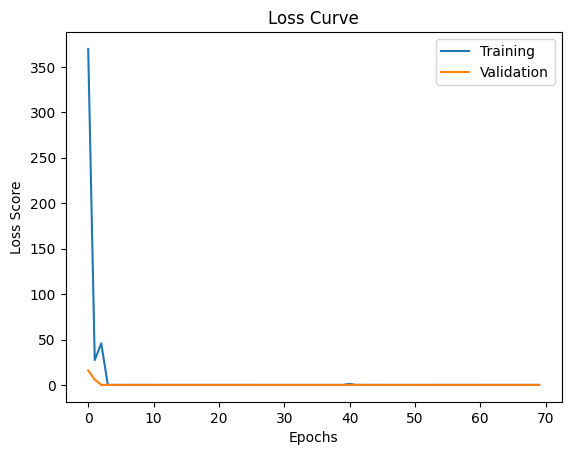

In [23]:
plt.plot(train_result.history['loss'])
plt.plot(train_result.history['val_loss'])
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss Score")
plt.legend(['Training', 'Validation'])
plt.show()

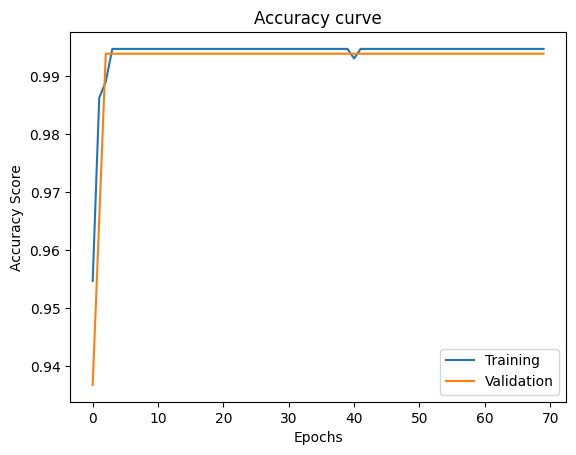

In [24]:
plt.plot(train_result.history['accuracy'])
plt.plot(train_result.history['val_accuracy'])
plt.title("Accuracy curve")
plt.xlabel("Epochs")
plt.ylabel("Accuracy Score")
plt.legend(['Training', 'Validation'])
plt.show()

In [25]:
pred = model.predict(X_test)
print(pred)


64/64 [==============================] - 0s 1ms/step
[[0.005381]
 [0.005381]
 [0.005381]
 ...
 [0.005381]
 [0.005381]
 [0.005381]]


In [27]:
result = model.evaluate(X_test, y_test)
print("Test - Loss Score", result[0])
print("Test - Accuracy", result[1])
#print("Test - F1 Score", result[2])

64/64 [==============================] - 0s 5ms/step - loss: 0.0903 - accuracy: 0.9881
Test - Loss Score 0.09028143435716629
Test - Accuracy 0.9881070256233215
